# Rediscover El Niño



[Course Module: Applied Data Analysis for Atmospheric Sciences Using Python]





----------------------------------

November 2018
Ting-Shuo Yo

## 聖嬰現象 El Niño

[聖嬰現象](https://zh.wikipedia.org/wiki/%E8%81%96%E5%AC%B0%E7%8F%BE%E8%B1%A1)（西班牙語：El Niño），是指東太平洋海水每隔數年就會異常升溫的現象，是聖嬰-南方振盪現象（El Niño-Southern Oscillation，簡稱ENSO）中，東太平洋升溫的階段。

<img src='figures/Sstaanim.gif'/>

自 [Bjerknes 1961 年的論文](https://journals.ametsoc.org/doi/10.1175/1520-0493%281969%29097%3C0163%3AATFTEP%3E2.3.CO%3B2)發表以來，ENSO 在大氣科學領域已經是一個眾所週知的現象，當年這個現象的發現，使用的是 Empirical orthogonal function (EOF) Analysis 這個分析工具，而 EOF 是 PCA 的一種形式，我們恰好可以利用熱帶太平洋的海溫資料和 PCA，追隨前人的腳步，來重新發現一次聖嬰現象。

## 赤道太平洋的海溫資料

NOAA 的網站提供了豐富的歷史資料，我們從 [COBE SST 資料集](https://www.esrl.noaa.gov/psd/data/gridded/data.cobe.html)當中，切割出 5S~5E / 180E ~ 90W / 1951-Jan ~ 2000-Dec 的月均海表溫度（SST）。

<img src='figures/Enso-index-map.png'/>

區域的選擇基本上是 ENSO-index 計算的區域 Nino3 和 Nino3.4 的組合。

## 分析前的準備

在開始之前，先載入會使用到的函式庫，並且讀取資料。

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
import os
os.environ['PROJ_LIB'] = '/Users/tsyo/anaconda/share/proj/'
#os.environ['PROJ_LIB'] = 'C:\\usr\\Anaconda3\\Library\\share\\'
from mpl_toolkits.basemap import Basemap

sstds = Dataset('../data/sst.mon.mean.subset.nc')

sstds.variables.keys()

odict_keys(['sst', 'time', 'lat', 'lon'])

## 繪圖前的準備

設定繪圖範圍，並製作資料網格。

In [2]:
sst = np.array(sstds.variables['sst'])
nt, ny, nx = sst.shape
print(sst.shape)

# Retrieve the longitude and lattitude from data
lons = sstds.variables['lon'][:]
lats = sstds.variables['lat'][:]
print('Lons: ' + str(lons[0]) + ' ~ ' + str(lons[-1]))
print('Lats: ' + str(lats[0]) + ' ~ ' + str(lats[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = np.meshgrid(lons,lats)

(600, 11, 91)
Lons: 180.5 ~ 270.5
Lats: 4.5 ~ -5.5


## 先看看資料的概況

我們先看看600個月的平均海溫的分佈如何。

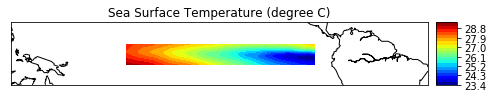

In [3]:
# create figure and axes instances
fig = plt.figure(figsize=(8,5))

# create a Basemap instance.
m = Basemap(llcrnrlon=125., urcrnrlon=325., llcrnrlat=-15, urcrnrlat=15.)

# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()

# Add some titles to make the plot readable by someone else
plt.title('Sea Surface Temperature (degree C)')

# make filled contour plot.
cs = m.contourf(x, y, sst.mean(axis=0), 20, cmap=plt.cm.jet)
m.colorbar()
plt.show()

## 主成分分析

主成分分析是針對二維矩陣，因此我們先把 (ny,nx) 的二維海溫分布資料拉平成唯一維的向量，然後針對一個 (nt, ny\*nx) 的矩陣進行分析。

[0.7752738  0.9353442  0.9560568  0.96675676 0.97479814 0.9804966
 0.98393947 0.9871116  0.9897051  0.9913643 ]


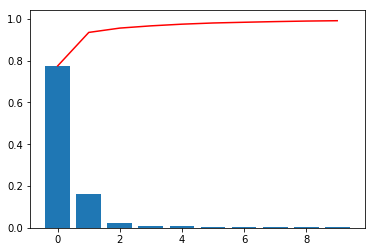

In [4]:
# PCA
sstf = np.array(sst).reshape(nt, ny*nx)                     # Flatten the 2D aaray for PCA
pca = PCA(n_components=10)                                  # Initialize a PCA with 10 PCs
pca.fit(sstf)                                               # Calculate PCA
proj = pca.transform(sstf)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
print(np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(10),pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.show()

從結果看來，前兩個主成分就可以解釋 93% 的變異，那我們就來看看他們是什麼樣子。

## PC1

從時間序列上來看，很像是每年的季節變化，而空間分布上也與50年平均相似。

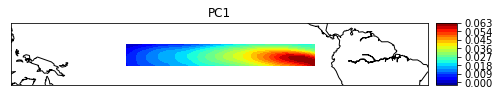

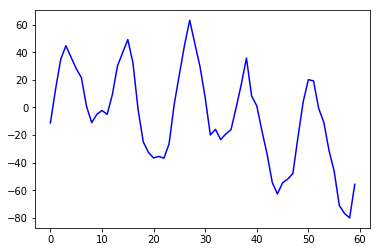

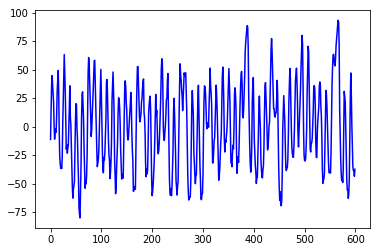

In [5]:
# create figure and axes instances
fig = plt.figure(figsize=(8,5))

# create a Basemap instance.
m = Basemap(llcrnrlon=125., urcrnrlon=325., llcrnrlat=-15, urcrnrlat=15.)

# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()

# Add some titles to make the plot readable by someone else
plt.title('PC1')

# make filled contour plot of PC1.
cs = m.contourf(x, y, pca.components_[0].reshape(ny,nx), 20, cmap=plt.cm.jet)
m.colorbar()
plt.show()

# Time series of PC1
plt.plot(proj[:60,0], 'b-')
plt.show()

# Time series of PC1
plt.plot(proj[:,0], 'b-')
plt.show()

## PC2

從空間分布上來看，是東太平洋一正一負的變化，而時間上有比較低頻（長於1年）的變化。

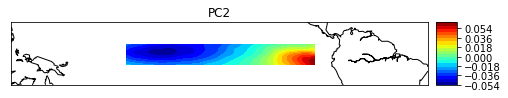

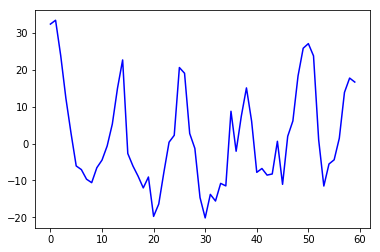

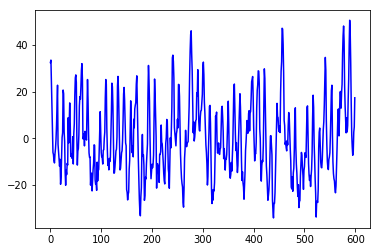

In [6]:
# create figure and axes instances
fig = plt.figure(figsize=(8,5))

# create a Basemap instance.
m = Basemap(llcrnrlon=125., urcrnrlon=325., llcrnrlat=-15, urcrnrlat=15.)

# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()

# Add some titles to make the plot readable by someone else
plt.title('PC2')

# make filled contour plot.
cs = m.contourf(x, y, pca.components_[1].reshape(ny,nx), 20, cmap=plt.cm.jet)
m.colorbar()
plt.show()

# Time series of PC1
plt.plot(proj[:60,1], 'b-')
plt.show()

# Time series of PC1
plt.plot(proj[:,1], 'b-')
plt.show()

基本上，PC2 就是後來取名為聖嬰現象的特殊海溫型態，有興趣深入探究的話，可以參考[Bjerknes 1969 年的論文](https://journals.ametsoc.org/doi/10.1175/1520-0493%281969%29097%3C0163%3AATFTEP%3E2.3.CO%3B2)，或是[較新近的回顧文獻](https://academic.oup.com/nsr/advance-article/doi/10.1093/nsr/nwy104/5126370)，並且從 NOAA 下載更完整的資料集來進行分析。